In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
weather_df = pd.read_csv("data/weather.csv")

num_cols = weather_df.select_dtypes(["number"]).columns

for column in num_cols:
        weather_df[column].fillna(weather_df[column].mean(), inplace=True)
        
weather_df = weather_df.drop(weather_df[weather_df["RainTomorrow"].isna()].index)

weather_df["RainTomorrow"].isna().sum()

/var/folders/hh/5x37qck55fv2xxq5_b1z68fr0000gn/T/ipykernel_82108/4283845587.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather_df[column].fillna(weather_df[column].mean(), inplace=True)


0

In [3]:
weather_df[num_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [4]:
# Перемішування набору даних
seed = 42  # Визначаємо seed для відтворюваності
weather_df = weather_df.sample(frac=1, random_state=seed)

# Вибір ознак та цільової змінної
X = weather_df[num_cols]
y = weather_df['RainTomorrow']

display(X)
display(y)

# Розділення даних на тренувальну та тестову вибірки (70% тренування і 30% тестування)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed)

# Створення екземпляра класифікатора випадкових лісів
clf = RandomForestClassifier(n_estimators=100)

# Тренування класифікатора на тренувальних даних
clf.fit(X_train, y_train)

# Прогнозування на тестовому наборі
y_pred = clf.predict(X_test)

# Обчислення точності
accuracy = accuracy_score(y_test, y_pred)
print(f"Точність: {accuracy:.2f}")


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
57760,7.1,13.0,8.8,5.468232,7.611178,41.0,24.0,22.0,100.000000,98.000000,1001.70000,1005.400000,8.000000,8.00000,8.6,11.5
127128,13.2,18.3,0.0,5.468232,7.611178,48.0,24.0,20.0,73.000000,73.000000,1027.60000,1023.800000,4.447461,4.50993,14.2,17.0
119994,9.2,22.7,0.0,5.000000,11.100000,52.0,26.0,20.0,45.000000,25.000000,1030.10000,1025.900000,0.000000,0.00000,15.1,22.5
7088,15.3,26.1,0.0,10.400000,7.611178,44.0,24.0,19.0,48.000000,40.000000,1013.20000,1009.800000,7.000000,7.00000,17.5,24.3
62992,11.9,31.8,0.0,5.000000,4.100000,72.0,6.0,19.0,89.000000,25.000000,1006.70000,1001.000000,7.000000,6.00000,16.2,27.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112920,9.0,18.9,12.6,5.468232,7.611178,43.0,20.0,15.0,68.880831,51.539116,1017.50000,1017.700000,4.447461,4.50993,15.8,17.6
122810,13.1,19.9,3.0,1.200000,2.300000,39.0,2.0,13.0,90.000000,55.000000,1018.10000,1018.200000,7.000000,7.00000,15.4,19.1
106280,10.8,25.5,0.0,12.000000,13.000000,44.0,26.0,15.0,41.000000,21.000000,1015.70000,1012.600000,0.000000,0.00000,15.3,23.1
135107,11.3,21.4,0.0,5.468232,7.611178,39.0,19.0,22.0,75.000000,79.000000,1017.64994,1015.255889,8.000000,4.00000,15.8,15.7


57760     Yes
127128     No
119994     No
7088       No
62992     Yes
         ... 
112920    Yes
122810     No
106280     No
135107    Yes
124925     No
Name: RainTomorrow, Length: 142193, dtype: object

Точність: 0.85


In [5]:
import joblib

joblib.dump(clf, "models/weather_model.joblib")

['models/weather_model.joblib']

In [6]:
importances = pd.DataFrame({"Feature": num_cols , "Importance":clf.feature_importances_})

importances.sort_values(by=["Importance"])

,Feature,Importance
12,Cloud9am,0.024446
3,Evaporation,0.031595
6,WindSpeed9am,0.039079
13,Cloud3pm,0.039201
7,WindSpeed3pm,0.041489
14,Temp9am,0.054160
15,Temp3pm,0.055260
1,MaxTemp,0.055396
0,MinTemp,0.056882
4,Sunshine,0.064043


In [7]:
important_cols = ["Humidity3pm", "Rainfall", "Pressure3pm", "WindGustSpeed"]

# Вибір ознак та цільової змінної
X = weather_df[important_cols]
y = weather_df['RainTomorrow']

display(X)
display(y)

# Розділення даних на тренувальну та тестову вибірки (70% тренування і 30% тестування)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed)

# Створення екземпляра класифікатора випадкових лісів
clf = RandomForestClassifier(n_estimators=100)

# Тренування класифікатора на тренувальних даних
clf.fit(X_train, y_train)

# Прогнозування на тестовому наборі
y_pred = clf.predict(X_test)

# Обчислення точності
accuracy = accuracy_score(y_test, y_pred)
print(f"Точність: {accuracy:.2f}")

,Humidity3pm,Rainfall,Pressure3pm,WindGustSpeed
57760,98.000000,8.8,1005.400000,41.0
127128,73.000000,0.0,1023.800000,48.0
119994,25.000000,0.0,1025.900000,52.0
7088,40.000000,0.0,1009.800000,44.0
62992,25.000000,0.0,1001.000000,72.0
...,...,...,...,...
112920,51.539116,12.6,1017.700000,43.0
122810,55.000000,3.0,1018.200000,39.0
106280,21.000000,0.0,1012.600000,44.0
135107,79.000000,0.0,1015.255889,39.0


57760     Yes
127128     No
119994     No
7088       No
62992     Yes
         ... 
112920    Yes
122810     No
106280     No
135107    Yes
124925     No
Name: RainTomorrow, Length: 142193, dtype: object

Точність: 0.82


In [8]:
import joblib

joblib.dump(clf, "models/weather_model.joblib")

joblib.dump(clf, "models/weather_model_zip.joblib",  compress=('zlib', 3))

['models/weather_model_zip.joblib']

In [9]:
X.describe()

,Humidity3pm,Rainfall,Pressure3pm,WindGustSpeed
count,142193.000000,142193.000000,142193.000000,142193.000000
mean,51.484041,2.350082,1015.257976,39.987612
std,20.532067,8.423217,6.681788,13.138391
min,0.000000,0.000000,977.100000,6.000000
25%,37.000000,0.000000,1011.000000,31.000000
50%,51.539116,0.000000,1015.255889,39.000000
75%,65.000000,0.800000,1019.400000,46.000000
max,100.000000,371.000000,1039.600000,135.000000


<Axes: ylabel='Frequency'>

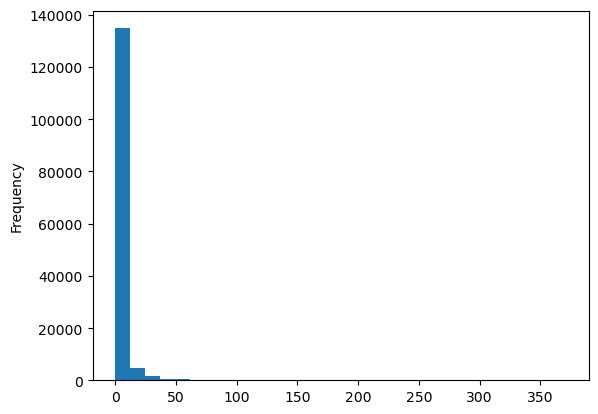

In [12]:
X["Rainfall"].plot(kind="hist", bins=30)